# Initial data review on Car Fuel & Emissions

This is the initial look into the data from Car Fuel & Emissions 2000-2013: https://www.kaggle.com/mrmorj/car-fuel-emissions.

Cleaned-up and consolidated car fuel consumption and emissions data for years 2000 to 2013. Data is published by the Vehicle Certification Agency (VCA), an Executive Agency of the United Kingdom Department for Transport.

It is assumed that the data is released under the UK Open Government License.

For more details about the data, please check the information booklet http://carfueldata.direct.gov.uk/additional/aug2013/VCA-Booklet-text-Aug-2013.pdf.


## Business understanding

Transport is responsible for nearly 30% of the EU’s total CO2 emissions, of which 72% comes from road transportation.<sup>[1](https://www.europarl.europa.eu/news/en/headlines/society/20190313STO31218/co2-emissions-from-cars-facts-and-figures-infographics)</sup> With the environmental discussion growing, governments have taken effort to promote greener cars in recent years. Introducing for example tax bands that represent the cleanness of a specific car, generally using a letter label (A, B, C, etc.), which enables governments to tax the polluter. Moreover, it helps the consumer choose cars that leave a smaller environmental footprint and forcer car manufacturers to produce cleaner cars.

It would be interesting to see which companies are doing well in this environmental challenge, or to see if manufacturers came from far, but have made an effort to become greener. Besides that, it is interesting to see which car properties determine the emissions of the car. Fuel, gear type, etc. and again see the differences in year, manufacturers, etc. We could also try to see if we can understand how these tax labels are assigned by looking at the data.


## Data understanding

This notebook will take us through the data phase of the CRISP-DM process with a step by step breakdown of the 'data.csv' file from the Car Fuel & Emissions 2000-2013 data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./data.csv')
df.shape

C:\Pim\Docs\u-data-science-car-emission\.venv\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(45511, 31)

Column 6 and 30 give a warning, so we'll look at those first. 

In [3]:
df.columns

Index(['file', 'year', 'manufacturer', 'model', 'description', 'euro_standard',
       'tax_band', 'transmission', 'transmission_type', 'engine_capacity',
       'fuel_type', 'urban_metric', 'extra_urban_metric', 'combined_metric',
       'urban_imperial', 'extra_urban_imperial', 'combined_imperial',
       'noise_level', 'co2', 'thc_emissions', 'co_emissions', 'nox_emissions',
       'thc_nox_emissions', 'particulates_emissions', 'fuel_cost_12000_miles',
       'fuel_cost_6000_miles', 'standard_12_months', 'standard_6_months',
       'first_year_12_months', 'first_year_6_months', 'date_of_change'],
      dtype='object')

Column 30 is the date of change, which shows us when the data in this row was changed. I don't think this information will be relavant to us at all. Column 6, on the other hand.

### Tax band

In [4]:
df['tax_band'].unique()

array([nan, 'G', 'F', 'E', 'D', 'C', 'I', 'A', 'M', 'B', 'J', 'H', 'K',
       'L'], dtype=object)

The tax band column (column 6) contains a letter score for the fuel and emissions of the car

In [5]:
df[['year','tax_band']].groupby(['year']).count()

,tax_band
year,
2000,0
2001,0
2002,0
2003,0
2004,0
2005,0
2006,0
2007,0
2008,0


The tax bands have only been introduced in 2012, so we cannot investigate the history of the tax bands on different manufacturers. However, this gives us a great opportunity to use a model and see if we can determine the tax bands.

### Numeric data

In [6]:
numeric_columns = df.select_dtypes(exclude=['object']).columns
numeric_columns

Index(['year', 'euro_standard', 'engine_capacity', 'urban_metric',
       'extra_urban_metric', 'combined_metric', 'urban_imperial',
       'extra_urban_imperial', 'combined_imperial', 'noise_level', 'co2',
       'thc_emissions', 'co_emissions', 'nox_emissions', 'thc_nox_emissions',
       'particulates_emissions', 'fuel_cost_12000_miles',
       'fuel_cost_6000_miles', 'standard_12_months', 'standard_6_months',
       'first_year_12_months', 'first_year_6_months'],
      dtype='object')

In [7]:
df[numeric_columns].describe()

,year,euro_standard,engine_capacity,urban_metric,extra_urban_metric,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,...,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months
count,45511.000000,45511.000000,45504.000000,45498.000000,45498.000000,45504.000000,45498.000000,45498.000000,45504.000000,45502.000000,...,45192.000000,40150.000000,5430.000000,14801.000000,33136.000000,12200.000000,3517.000000,2926.000000,3517.000000,1419.000000
mean,2007.316055,3.969282,2182.770526,10.472676,6.139602,7.721963,30.527557,49.139714,40.048475,72.141437,...,375.084962,127.164387,171.675235,3.312089,1548.094490,610.982869,165.612738,107.159774,231.558146,78.872093
std,3.832559,0.838025,899.100669,3.984944,1.783382,2.503880,10.623745,12.189658,11.869572,1.825107,...,1048.920760,1189.748216,35.786659,12.678128,518.408529,181.508911,114.299761,56.606074,264.641858,11.871715
min,2000.000000,2.000000,209.000000,3.100000,2.900000,1.200000,6.800000,5.400000,5.900000,0.200000,...,-200.000000,0.250000,0.290000,0.000000,0.000000,0.000000,0.000000,55.000000,0.000000,66.000000
25%,2004.000000,3.000000,1598.000000,7.700000,4.900000,5.900000,22.800000,40.400000,31.400000,71.000000,...,188.800000,24.000000,155.000000,0.019000,1220.570000,497.000000,100.000000,66.000000,0.000000,66.000000
50%,2008.000000,4.000000,1988.000000,9.800000,5.900000,7.300000,28.800000,47.900000,38.700000,72.000000,...,302.000000,56.000000,170.000000,0.073000,1463.000000,592.000000,135.000000,93.500000,135.000000,74.250000
75%,2011.000000,5.000000,2429.000000,12.400000,7.000000,9.000000,36.700000,57.600000,47.900000,73.300000,...,480.000000,179.000000,187.000000,0.800000,1768.250000,693.000000,215.000000,118.250000,325.000000,93.500000
max,2013.000000,6.000000,8285.000000,41.200000,97.900000,44.000000,91.100000,97.400000,235.400000,83.000000,...,75000.000000,237000.000000,332.000000,396.000000,5538.000000,3329.000000,475.000000,261.250000,1030.000000,93.500000


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'engine_capacity'}>],
       [<AxesSubplot:title={'center':'noise_level'}>, <AxesSubplot:>]],
      dtype=object)

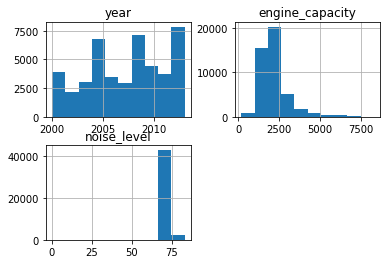

In [8]:
df[['year', 'engine_capacity', 'noise_level']].hist()

We have enough information for each year. The engine capacity seems to be a little right skewed. There seem to be a few outliers in noise_level. I wonder if those are the electrical cars.

In [9]:
quiet_cars = df[df['noise_level'] < 50]
quiet_cars['fuel_type'].value_counts()

Petrol    4
Name: fuel_type, dtype: int64

They are not electrical cars. However, it would be interesting to look deeper into this question.

In [20]:
df['euro_standard'].value_counts()

4    20269
5    12271
3    10717
2     1865
6      389
Name: euro_standard, dtype: int64

After a quick search, I figured the euro standard is the type of fuel from cleanest (1) to dirtiest (6): https://www.rac.co.uk/drive/advice/emissions/euro-emissions-standards/

**urban_metric, extra_urban_metric, combined_metric, urban_imperial, extra_urban_imperial, combined_imperial** 

"Urban means driving in a built up area, towns and cities, where you're stopping and starting and restricted to a slow speed. Extra Urban is a new term to depict driving on the open road. Combined is an average of the two.": https://uk.answers.yahoo.com/question/index?qid=20120506094219AAEllQz

Whether we use metric or imperial doesn't really matter, but since I'm from mainland Europe and from a scientific background, I prefer the metric system. Since the combined value is just the average between urban and extra urban, this value is not useful for any modelling, however, it's worth having a look at it here.

array([[<AxesSubplot:title={'center':'urban_metric'}>,
        <AxesSubplot:title={'center':'extra_urban_metric'}>],
       [<AxesSubplot:title={'center':'combined_metric'}>, <AxesSubplot:>]],
      dtype=object)

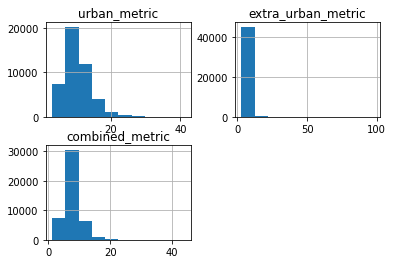

In [27]:
df[['urban_metric', 'extra_urban_metric', 'combined_metric']].hist()

All are right skewed, and the extra urban values seem to have worse outliers

In [33]:
high_combined = df[df['combined_metric'] > 30]
high_combined

,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,...,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
20390,Part_A_Euro_IV_may2007.csv,2007,Kia,Sorento,2.5 CRDi,4,NaN,5MT,Manual,2497.0,...,317.0,NaN,0.043,1417.0,NaN,NaN,NaN,NaN,NaN,NaN
42908,download-data-for-Aug-2013-Euro-5.csv,2013,Mercedes-Benz,"B-Class, Model Year 2013","B 180 CDI with 16"" rear wheels",5,C,M6,Manual,1796.0,...,150.0,175.0,0.100,1232.0,NaN,NaN,NaN,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'co2'}>,
        <AxesSubplot:title={'center':'thc_emissions'}>],
       [<AxesSubplot:title={'center':'co_emissions'}>,
        <AxesSubplot:title={'center':'nox_emissions'}>],
       [<AxesSubplot:title={'center':'thc_nox_emissions'}>,
        <AxesSubplot:title={'center':'particulates_emissions'}>]],
      dtype=object)

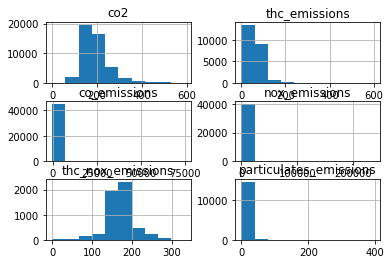

In [34]:
df[['co2', 'thc_emissions', 'co_emissions', 'nox_emissions',
       'thc_nox_emissions', 'particulates_emissions']].hist()

The co2 and thc nox emissions seem to be quite symmetrical, while the thc emissions are left skewed. The remaining three graphs again show that there are outliers.

array([[<AxesSubplot:title={'center':'fuel_cost_12000_miles'}>,
        <AxesSubplot:title={'center':'fuel_cost_6000_miles'}>],
       [<AxesSubplot:title={'center':'standard_12_months'}>,
        <AxesSubplot:title={'center':'standard_6_months'}>],
       [<AxesSubplot:title={'center':'first_year_12_months'}>,
        <AxesSubplot:title={'center':'first_year_6_months'}>]],
      dtype=object)

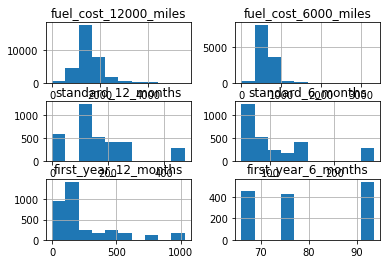

In [44]:
df[['fuel_cost_12000_miles',
       'fuel_cost_6000_miles', 'standard_12_months', 'standard_6_months',
       'first_year_12_months', 'first_year_6_months']].hist()

The fuel cost at 12000 clearly shows that it's just around 2 times the fuel cost at 6000, which is expected. Therefore, one of these columns is redundant and might skew our model. Thus, I'll use only the 'fuel_cost_12000_miles', 'standard_12_months', and 'first_year_12_months' fields.

#### Heatmap
A great way of showing correlation between numeric data is a heatmap.

<AxesSubplot:>

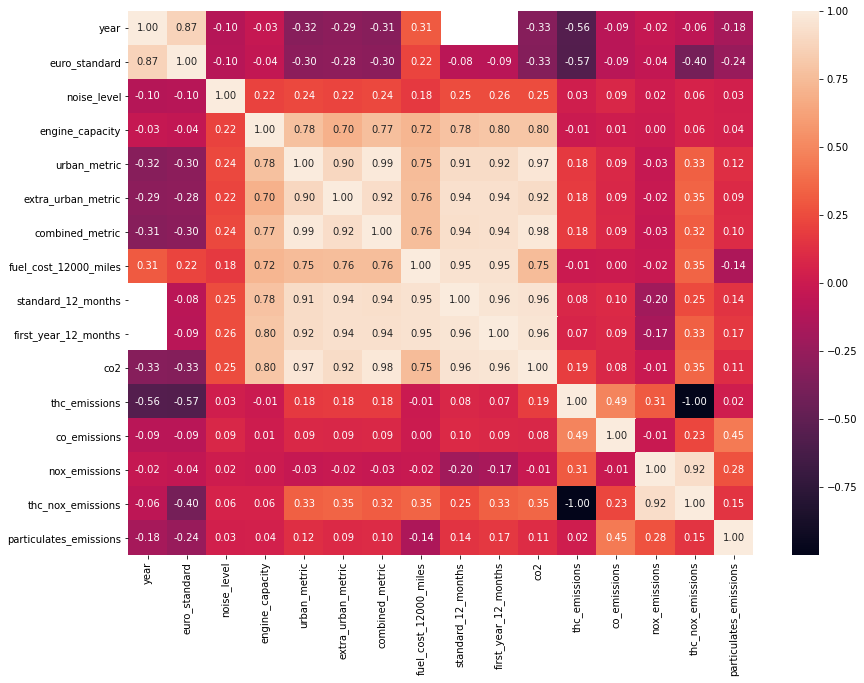

In [53]:
df_numeric = df[['year', 'euro_standard', 'noise_level', 'engine_capacity', 'urban_metric',
       'extra_urban_metric', 'combined_metric', 'fuel_cost_12000_miles', 'standard_12_months',
       'first_year_12_months', 'co2',
       'thc_emissions', 'co_emissions', 'nox_emissions', 'thc_nox_emissions',
       'particulates_emissions']]

plt.figure(figsize=(14,10)) 
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f')

I have ordered the columns in such a way that creates 'patches' of correlation. 

The first thing that you'll notice is the large beige area around the middle of the graph, which means that these fields are all closely correlated. I am confident that the engine capacity plays a big role in this, and that the other fields are results of that engine. Since we're looking at emissions, the main we get out of this is that the co2 emission is closely related to this, and that large engines are probably very environmentally unfriendly.

By just looking at the year, we can already conclude a few things. The euro standard is highly correlated and has thus been growing over the years. The euro standard is a legal framework that prohibits cars from being made that to not meet up certain standards.<sup>[2](https://en.wikipedia.org/wiki/European_emission_standards)</sup> These standards have been developed and have become stricter over the years. This means that cars with a low standard are not allowed to be made anymore. As a result of that, car manufacturers have been improving their standard.

Besides that, we see a couple of metrics that have a negative correlation to the year. The thc emission have been reducing a lot (-0.56) along with the co2 emissions (-0.33). It is great to see that there is such a decrease in car emissions, even though there's still a long way to go. Most important in this study is too see that there's an effect that works, even though we should aim for even better results.

#### improvements to the heatmap

The thc_nox_emissions show strange results as there's a full negative correlation between it and the thc_emissions. I'll therefore just remove this column from the model as well.

Besides that, it's not entirely clear what the urban, urban_extra, and combined columns mean. And since they're very similar columns, it's probably fine to combine then, thus using the combined metric field.

The same holds for the standard_12_months and first_year_12_months columns. It's unclear and they don't seem to differ much from the fuel costs 12000 miles column, so I'll remove these two as well.

<AxesSubplot:>

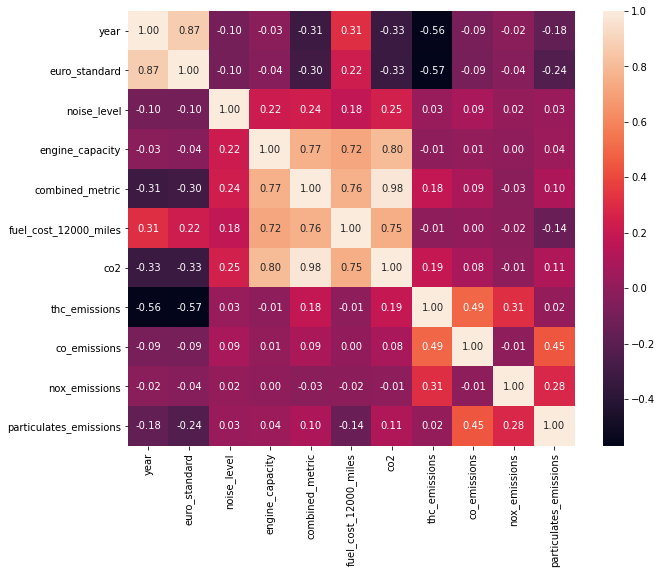

In [55]:
df_numeric = df[['year', 'euro_standard', 'noise_level', 'engine_capacity', 'combined_metric', 'fuel_cost_12000_miles', 
                 'co2', 'thc_emissions', 'co_emissions', 'nox_emissions', 'particulates_emissions']]

plt.figure(figsize=(10,8)) 
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f')

### Categorical data

In [65]:
df.select_dtypes(include=['object']).columns # get object columns

Index(['file', 'manufacturer', 'model', 'description', 'tax_band',
       'transmission', 'transmission_type', 'fuel_type'],
      dtype='object')

In [66]:
df['file'].unique() # check data from file column

array(['DatapartC_july2000.csv', 'DataPartB_july2000.csv',
       'DataPartA_july2000.csv', 'Part_B_Euro_III_july2001.csv',
       'Part_C_Euro_II_july2001.csv', 'Part_A_Euro_IV_july2001.csv',
       'Part_B_Euro_III_may2002.csv', 'Part_A_Euro_IV_may2002.csv',
       'Part_C_Euro_II_may2002.csv', 'Part_B_Euro_III_may2003.csv',
       'Part_A_Euro_IV_may2003.csv', 'Part_B_Euro_III_latest.csv',
       'Part_A_Euro_IV_latest.csv', 'Part_B_Euro_III_may2005.csv',
       'Part_A_Euro_IV_may2005.csv', 'Part_A_Euro_IV_may2006.csv',
       'Part_B_Euro_III_may2006.csv', 'Part_A_Euro_IV_may2007.csv',
       'Part_B_Euro_III_may2007.csv', 'Part_A_Euro_IV_may2008.csv',
       'download-data-for-May-2009-Euro-4.csv',
       'download-data-for-May-2009-Euro-5.csv',
       'download-data-for-May-2010-Euro-5.csv',
       'download-data-for-May-2010-Euro-4.csv',
       'Euro 5 snapshot 2011.csv', 'Euro 4 snapshot 2011.csv',
       'Euro 6 snapshot 2011.csv',
       'download-data-for-Aug-2012-Euro-5.cs

I don't think this info is necessarily usefull, so I'll drop this table

In [67]:
df['manufacturer'].unique() # check data from file column

array(['Alfa Romeo', 'Aston Martin Lagonda', 'Audi', 'BMW', 'Cadillac',
       'Chevrolet', 'Chrysler Jeep', 'Citroen', 'Daewoo Cars', 'Daihatsu',
       'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar Cars', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lotus', 'LTI', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Metrocab',
       'Micro Compact Car', 'Mitsubishi', 'Nissan', 'Perodua', 'Peugeot',
       'Porsche', 'Proton', 'Renault', 'Rolls-Royce',
       'Rover Group Limited', 'Saab', 'Seat', 'Skoda', 'Subaru', 'Suzuki',
       'Tata', 'Toyota', 'Vauxhall', 'Volkswagen', 'Volvo',
       'MG Rover Group', 'Mini', 'Morgan Motor Company', 'Bentley Motors',
       'Smart', 'SsangYong', 'Corvette', 'Dodge', 'Hummer', 'Abarth',
       'Infiniti', 'MG Motors Uk', 'McLaren', 'Dacia', 'MG Motors UK'],
      dtype=object)

In [10]:
df['manufacturer'].unique().shape

(62,)

This seems like usefull information, so I'll create dummies for it.

In [68]:
df['model'].unique().shape # check data from file column

(2649,)

That's a lot of dummies, so I'll leave it out, but I might try if the r2 scores are low

In [69]:
df['description'].unique().shape

(14989,)

Not usefull

In [70]:
df['transmission'].unique()

array(['M5', 'SAT5', 'M6', 'A4', 'A5', 'QM6', 'QA5', 'QM5', 'QM', 'QA',
       'FA5', 'FM5', 'FA4', 'A3', 'CVT', 'A', '4SS', 'M4', 'SAT 5', '5MT',
       '4AT', 'M5x2', 'M5/s', 'SM6', 'A6', 'MT', 'AT', 'M5N', 'A4L',
       'M5NE', 'A4NE', '3AT', '5MTx2', '4ATx2', 'A4x2', 'M', 'AV', 'QA6',
       'SS5', 'S/A6', 'M3', 'MTA', 'SAT6', 'Hybrid', 'QD6', 'D6',
       'A/SAT5', 'ASM', 'A5x2', 'M6/S6', 'A7', 'Multi5', 'E-CVT',
       'Electric', 'm5', 'SMG 7', '6MT', '5A/Tx2', 'M6x2', '5AT', '6AMT',
       '5 AMT', 'MTA5', 'i-SHIFT', 'A8', 'DCT7', 'M6-AWD', 'S6', 'A6x2',
       'D7', 'M7', 'A5-AWD', 'MultiDrive', 'MTA6', 'QD7', 'A6-AWD', 'DM6',
       'MCVT', 'Semi-Auto', 'AM5', 'Multi6', 'MultiDriv', 'DCT6', 'ET5',
       'QA8', '6AT', 'AMT6', 'AMT5', '7SP. SSG', 'ASM  ', nan, 'M8',
       'A8-AWD'], dtype=object)

This will be usefull info, so I'm going to create dummies for it. 

In [71]:
df['transmission_type'].unique() # check data from transmission_type column

array(['Manual', 'Automatic', nan], dtype=object)

Usefull info, I don't think nan would mean anything here, so I'm not creating a column for that

In [72]:
df['fuel_type'].unique() # check data from transmission_type column

array(['Petrol', 'Diesel', 'LPG', 'Petrol Hybrid', 'CNG',
       'Petrol Electric', 'LPG / Petrol', 'Petrol / E85 (Flex Fuel)',
       'Petrol / E85', 'Diesel Electric', 'Electricity/Petrol',
       'Electricity', 'Electricity/Diesel'], dtype=object)

That'll be usefull information as well and not creating a lot of dummies

#### Summary
- file: drop, because useless;
- manufacturer: create dummies;
- model: drop, because too many, but return if low r2;
- description: drop, because useless and too many;
- transmission: create dummies, without nan, as that doesn't mean much. I also noticed two versions, 'ASM' and 'ASM ', so I'll combine those first.
- transmission_type: create dummies, without nan, as that doesn't mean anything (unless it means you have to push the car, which is very energy efficient).
- fuel_type: create dummies;

**note**: one thing I noticed is that there's a high amount of low occurences in some of the categories, which might cause issues for our models.

## Prepare data

The tax bands are only assigned to cars from the last two years, 2012 and 2013, so we cannot see any improvement during the years there. It is, however, possible to model the tax band using the data from 2012 and 2013 to estimate the tax band of the cars in earlier years. This will be the main focus of the project from now on.

For the numeric columns, we made a selection of relevant information that doesn't duplicate any knowledge: year, euro_standard, noise_level, engine_capacity, combined_metric, fuel_cost_12000_miles, co2, thc_emissions, co_emissions, nox_emissions, particulates_emissions. If we see problems during our modelling phase, we can review this and look for improvements.

Besides that, many numeric columns included a few outliers, which might cause issues in our model. However, since there's not that many outliers, I don't expect it to have a huge influence. If we see problems in our modelling, it will be worth revisiting.

For the categorical column, I decided to remove the file column as it doesn't represent anything related. The model and description could be useful for analysis, but won't improve our model as there's too many unique values. For the remaining columns: manufacturer, transmission, transmission_type and fuel_type, we should create dummies as they could be a great indication on the influence. We won't include any nan dummies as there's no such thing as having no fuel/manufacturer/etc.